# imports

In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#check local virtual env (expected 'plt')
!pyenv local

plt


In [10]:
train_path="../raw_data/train.csv"

# load datasets

## load functions

In [4]:
def load_data(file_path: str, size:int =-1, y_index:int=-1) -> (pd.DataFrame, pd.DataFrame) :
    """
    'file_path' = the path to the required file (typically 'train.csv' or 'test.csv' under a 'raw_data' folder)
    NB: it can be an absolute or a relative path !
    if 'size'=-1 the entire data is returned, else only the 1st 'size' rows (might also suffle if this is better) are returned
    'y_index' expected values = [-1,0,1,2,3,4,5] indicated which evaluation(s) will be returned
    outputs= (X_raw,y):
        X_raw= 2-column DataFrame ['text_id','full_text']  
        y= a 6-column DataFrame (or a 1-column DataFrame if y_index is used)
        nb of rows in X_raw and y is controlled by the 'size' kwarg
    """
    df=pd.read_csv(file_path)
    X_raw=df[['text_id','full_text']].iloc[0:size,:]
    y=df[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].iloc[0:size,:]
    if y_index >0 and y_index < len(y.columns):
        y=y.iloc[:,[y_index]]         
    
    return X_raw,y

In [6]:
def load_train_test_data(file_path:str, y_index:int=-1, split_ratio:float=0.3,reshuffle:bool=True) -> (pd.DataFrame, pd.DataFrame,pd.DataFrame, pd.DataFrame) :
    """
    'file_path' = the path to the required file (typically 'train.csv' or 'test.csv' under a 'raw_data' folder)
    NB: it can be an absolute or a relative path !
    'y_index' expected values = [-1,0,1,2,3,4,5] indicated which evaluation(s) will be returned
    'split_ratio'is expected to be >0 and <1 ([0.01-0.99])
    data is reshuffled when 'reshuffle'= True!
    outputs= (X_train_raw,X_test_raw,y_train,y_test):
        X_train_raw, X_test_raw= 2x 2-column DataFrames ['text_id','full_text']  
        y_train, y_test= 2x 6-column DataFrames (or  1-column DataFrames if y_index is used)
        nb of rows in (X_train_raw,y_train,X_val_raw,y_val) is controlled by the 'split_ratio' kwarg
    """
    df=pd.read_csv(file_path)
    if reshuffle:
        df=df.sample(frac=1)
    len_train=int(df.shape[0]*(1-split_ratio))
    target_names=['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
    X_train_raw=df[['text_id','full_text']].iloc[:len_train,:]
    y_train=df[target_names].iloc[:len_train,:]
    X_test_raw=df[['text_id','full_text']].iloc[len_train:,:]
    y_test=df[target_names].iloc[len_train:,:]    
    if y_index >0 and y_index < len(y_train.columns):
        y_train=y_train.iloc[:,[y_index]]         
        y_test=y_val.iloc[:,[y_index]]         
    return X_train_raw,X_test_raw,y_train,y_test

## load

In [7]:
X_raw, y= load_data(train_path)
X_raw.shape, y.shape

((3910, 2), (3910, 6))

In [11]:
X_train_raw,X_test_raw,y_train,y_test=load_train_val_data(train_path, split_ratio=0.3,reshuffle=False)
X_train_raw.shape,X_test_raw.shape,y_train.shape,y_test.shape

((2737, 2), (1174, 2), (2737, 6), (1174, 6))

## basic data analysis /unit testing

In [12]:
X_train_raw

,text_id,full_text
0,0016926B079C,I think that students would benefit from learn...
1,0022683E9EA5,When a problem is a change you have to let it ...
2,00299B378633,"Dear, Principal\n\nIf u change the school poli..."
3,003885A45F42,The best time in life is when you become yours...
4,0049B1DF5CCC,Small act of kindness can impact in other peop...
...,...,...
2732,C8F035B467A7,This generation is influenced by technology an...
2733,C928D32FE5C5,Are vacations a necessity to us and to our suc...
2734,C92C73888D49,In my opinion\n\nThomas Jefferson wrote a stat...
2735,C93925EDB882,Author Ralph Waldo Emerson wrote a quote that ...


In [13]:
y_train

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
2732,3.0,3.5,3.5,3.0,3.5,3.5
2733,4.5,4.5,4.5,4.5,4.5,5.0
2734,2.0,2.5,2.5,3.0,2.0,2.5
2735,4.0,4.0,4.0,4.0,3.5,3.0


In [15]:
X_test_raw

,text_id,full_text
2737,C968149003DE,So many people at my middle school want to sta...
2738,C972C565A819,Do you want to see a temple made with gold? I ...
2739,C97525A88E48,It has been said that a positive attitude is t...
2740,C97C2190DB65,Imagine someone asking another person wheither...
2741,C996AAF4ADF6,I think my preference is working with a group ...
...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...
3907,FFD9A83B0849,"Working alone, students do not have to argue w..."
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best..."
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...


In [ ]:
X_raw

In [ ]:
X_raw['len_text']=X_raw.full_text.apply(len)
print(len(X_raw.full_text[0]))
X_raw

In [ ]:
X_raw.len_text.hist(bins=100)

In [ ]:
X_raw.len_text.min(),X_raw.len_text.max()

In [ ]:
x0=X_raw.full_text[0]
print(len(x0))
x0

In [ ]:
x0_split=x0.split()
print(len(x0_split))
x0_split

In [ ]:
x1=x0.replace(".", " . ")
x2=x1.replace("\n\n", " CR ")
print(len(x2.split()))
x2.split()


## functionize data pre_processing

### punctuation preproc

In [41]:
def punctuation_preproc_(X:pd.DataFrame)->pd.DataFrame:
    """
    assumption X has a column labelled 'full_text'
    modify 'full_text': 
        *replace '\n\n' by 'CR'(=Carriage Return)
        *add spaces around dot ('.') punctation mark so that it is counted
    add a new column ('character_count')
    add a new column ('word_count')
    add a new column ('element_count')
    """
    def punctuation_processing(x:str)->str:
        x=x.replace(".", " . ")
        x=x.replace("\n\n", " CR ")
        return x
    X1=pd.DataFrame.copy(X)
    X1['character_count']=X1.full_text.apply(len)
    X1['word_count']=X1.full_text.apply(lambda x: len(x.split()))
    X1.full_text=X1.full_text.apply(punctuation_processing)
    X1['element_count']=X1.full_text.apply(lambda x: len(x.split()))
    return X1

In [42]:
def punctuation_preproc(X:pd.DataFrame,X_test:pd.DataFrame=None,X_val:pd.DataFrame=None)->pd.DataFrame:
    if X_test== None and X_val==None:
        return punctuation_preproc_(X)
    if X_test and X_val==None:
        return punctuation_preproc_(X),punctuation_preproc_(X_test)
    if X_test==None and X_val:
        return punctuation_preproc_(X),punctuation_preproc_(X_val)
    if X_test and X_val:
        return punctuation_preproc_(X),punctuation_preproc_(X_test),punctuation_preproc_(X_val)
    return None

### (full) sentence preproc

In [32]:
def sentence_processing(x:str)->str:
    tokens=x.split()
    if len(tokens)>490:
        tokens=tokens[:490]
    x=' '.join(tokens)
    x.rstrip('.')
    return x

In [33]:
def sentence_preproc_(X:pd.DataFrame)->pd.DataFrame:
    """
    assumption X has a column labelled 'full_text'
    shorten 'full_text' with following rules:
        * it ends with a dot ('.')
        * as long as possible but less than 490 elements (~words)    
    add a new column ('new_element_count')
    """
    def sentence_processing(x:str)->str:
        tokens=x.split()
        if len(tokens)>490:
            tokens=tokens[:490]
        x=' '.join(tokens)
        x.rstrip('.')
        return x
    X1=pd.DataFrame.copy(X)
    X1.full_text=X1.full_text.apply(sentence_processing)
    X1['new_element_count']=X1.full_text.apply(lambda x: len(x.split()))
    return X1

In [35]:
def sentence_preproc(X:pd.DataFrame,X_test:pd.DataFrame=None,X_val:pd.DataFrame=None)->pd.DataFrame:
    if X_test== None and X_val==None:
        return sentence_preproc_(X)
    if X_test and X_val==None:
        return sentence_preproc_(X),sentence_preproc_(X_test)
    if X_test==None and X_val:
        return sentence_preproc_(X),sentence_preproc_(X_val)
    if X_test and X_val:
        return sentence_preproc_(X),sentence_preproc_(X_test),sentence_preproc_(X_val)
    return None

### play with punctation preprocessing

In [25]:
X_raw, y= load_data(train_path)
X_raw.shape, y.shape

((3910, 2), (3910, 6))

In [46]:
X_raw_preproc1=punctuation_preproc(X_raw)
print(X_raw_preproc1.shape)
X_raw_preproc1

(3910, 5)


,text_id,full_text,character_count,word_count,element_count
0,0016926B079C,I think that students would benefit from learn...,1387,261,282
1,0022683E9EA5,When a problem is a change you have to let it ...,2635,533,552
2,00299B378633,"Dear, Principal CR If u change the school poli...",1663,320,340
3,003885A45F42,The best time in life is when you become yours...,3973,728,773
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,1326,234,239
...,...,...,...,...,...
3905,FFCDB2524616,"I agree with Ralph Waldo Emerson's "" CR To be ...",1415,263,278
3906,FFD29828A873,I believe using cellphones in class for educat...,977,179,187
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",2603,465,487
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",1298,257,264


In [44]:
print('character range : ',X_raw_preproc1.character_count.min(),X_raw_preproc1.character_count.max())
print('word range : ',X_raw_preproc1.word_count.min(),X_raw_preproc1.word_count.max())
print('element range : ',X_raw_preproc1.element_count.min(),X_raw_preproc1.element_count.max())

character range :  82 6044
word range :  14 1260
element range :  14 1302


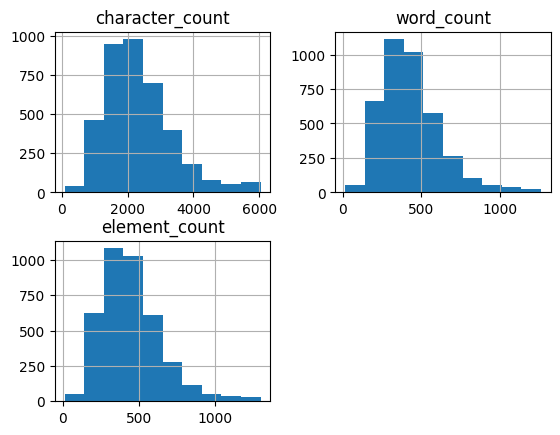

In [29]:
X_raw_preproc1.hist();

### sentence preprocessing unit tests

In [36]:
x0= X_raw_preproc1.full_text[0]
x1=X_raw_preproc1.full_text[1]
X_raw_preproc1.element_count[0],X_raw_preproc1.element_count[1],

(282, 552)

In [38]:
len(sentence_processing(x0).split())

282

In [39]:
len(sentence_processing(x1).split())

490

### play with sentence preprocessing

In [47]:
X_raw_preproc2=sentence_preproc(X_raw_preproc1)
print(X_raw_preproc2.shape)
X_raw_preproc2

(3910, 6)


,text_id,full_text,character_count,word_count,element_count,new_element_count
0,0016926B079C,I think that students would benefit from learn...,1387,261,282,282
1,0022683E9EA5,When a problem is a change you have to let it ...,2635,533,552,490
2,00299B378633,"Dear, Principal CR If u change the school poli...",1663,320,340,340
3,003885A45F42,The best time in life is when you become yours...,3973,728,773,490
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,1326,234,239,239
...,...,...,...,...,...,...
3905,FFCDB2524616,"I agree with Ralph Waldo Emerson's "" CR To be ...",1415,263,278,278
3906,FFD29828A873,I believe using cellphones in class for educat...,977,179,187,187
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",2603,465,487,487
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",1298,257,264,264


In [48]:
print('character range : ',X_raw_preproc2.character_count.min(),X_raw_preproc2.character_count.max())
print('word range : ',X_raw_preproc2.word_count.min(),X_raw_preproc2.word_count.max())
print('element range : ',X_raw_preproc2.element_count.min(),X_raw_preproc2.element_count.max())
print('new_element range : ',X_raw_preproc2.new_element_count.min(),X_raw_preproc2.new_element_count.max())

character range :  82 6044
word range :  14 1260
element range :  14 1302
new_element range :  14 490


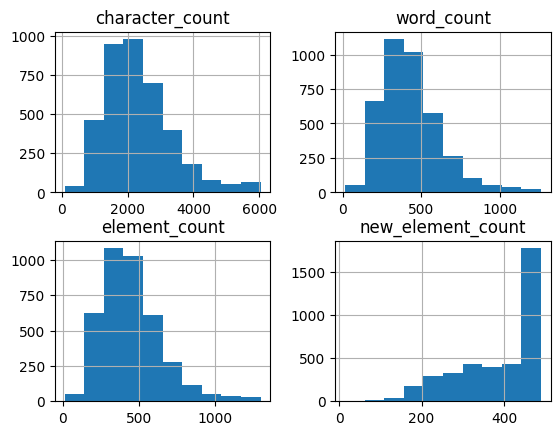

In [49]:
X_raw_preproc2.hist();

# Baseline (simple mean)

## baseline in one cell

In [ ]:
X_train_raw, y_train= load_data(train_path)
baseline_score=np.sqrt(((y_train-y_train.mean())**2).mean(axis=0)).mean()
baseline_score

# BERT Basic Model

## Tokenize inputs

### load tokenizer

In [51]:
from transformers import BertTokenizer

In [52]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

### unit test tokenizer

In [ ]:
X_raw

In [63]:
list_x=[X_raw.full_text[0],X_raw.full_text[1],
        X_raw_preproc1.full_text[0],X_raw_preproc1.full_text[1],
        X_raw_preproc2.full_text[0],X_raw_preproc2.full_text[1],
       ]

In [72]:
x0_raw_tokenized=tokenizer(X_raw.full_text[0],return_tensors="tf",return_token_type_ids=False)
x1_raw_tokenized=tokenizer(X_raw.full_text[1],return_tensors="tf",return_token_type_ids=False)
x0_raw__preproc1_tokenized=tokenizer(X_raw_preproc1.full_text[0],return_tensors="tf",return_token_type_ids=False)
x1_raw__preproc1_tokenized=tokenizer(X_raw_preproc1.full_text[1],return_tensors="tf",return_token_type_ids=False)
x0_raw__preproc2_tokenized=tokenizer(X_raw_preproc2.full_text[0],return_tensors="tf",return_token_type_ids=False)
x1_raw__preproc2_tokenized=tokenizer(X_raw_preproc2.full_text[1],return_tensors="tf",return_token_type_ids=False)

In [71]:
print(x0_raw_tokenized['input_ids'].shape)
print(x1_raw_tokenized['input_ids'].shape)
print(x0_raw__preproc1_tokenized['input_ids'].shape)
print(x1_raw__preproc1_tokenized['input_ids'].shape)
print(x0_raw__preproc2_tokenized['input_ids'].shape)
print(x1_raw__preproc2_tokenized['input_ids'].shape)

(1, 295)
(1, 567)
(1, 298)
(1, 572)
(1, 298)
(1, 510)


In [84]:
x0_raw_tokenized['input_ids'].shape[1]

295

In [76]:
X_raw.full_text

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3905    I agree with Ralph Waldo Emerson's "\n\nTo be ...
3906    I believe using cellphones in class for educat...
3907    Working alone, students do not have to argue w...
3908    "A problem is a chance for you to do your best...
3909    Many people disagree with Albert Schweitzer's ...
Name: full_text, Length: 3910, dtype: object

In [109]:
# X_raw_tokenized=tokenizer(list(X_raw.full_text),return_tensors="tf",return_token_type_ids=False)
#  X_raw__preproc1_tokenized=tokenizer(list(X_raw_preproc1.full_text),return_tensors="tf",return_token_type_ids=False)
X_raw__preproc2_tokenized=tokenizer(list(X_raw_preproc2.full_text),return_tensors="tf",return_token_type_ids=False, padding='max_length',truncation=True)

In [112]:
indexes = []
for i in X_raw__preproc2_tokenized['attention_mask']:
    indexes.append(np.unique(i,return_index=True))

In [141]:
len(indexes)

3910

In [122]:
counts = {}
counts['no padding'] = 0
counts['index first zero'] = []
counts['ntext'] = []
for index,(i,j) in enumerate(indexes):
    if len(i)<2:
        counts['no padding']+=1
        continue
    counts['index first zero'].append(j[0])
    counts['ntext'].append(index)

In [146]:
counts["no padding"]+len(counts['index first zero'])==len(X_raw_preproc2)

True

In [147]:
counts["no padding"]+len(counts['ntext'])==len(X_raw_preproc2)

True

(array([  3.,  17.,  34., 106., 284., 297., 368., 391., 379., 502.]),
 array([ 16. ,  65.5, 115. , 164.5, 214. , 263.5, 313. , 362.5, 412. ,
        461.5, 511. ]),
 <BarContainer object of 10 artists>)

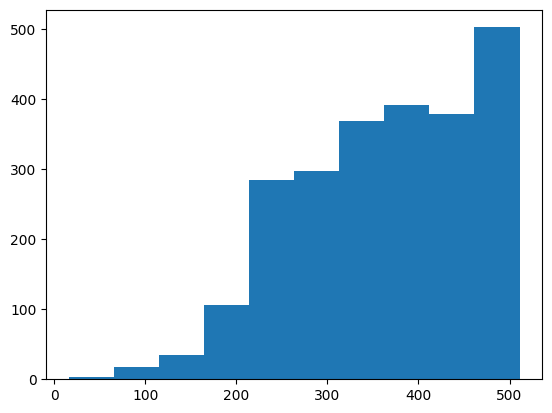

In [121]:
plt.hist(counts['index first zero'])

In [129]:
X_raw_preproc2.reset_index().head()

,index,text_id,full_text,character_count,word_count,element_count,new_element_count
0,0,0016926B079C,I think that students would benefit from learn...,1387,261,282,282
1,1,0022683E9EA5,When a problem is a change you have to let it ...,2635,533,552,490
2,2,00299B378633,"Dear, Principal CR If u change the school poli...",1663,320,340,340
3,3,003885A45F42,The best time in life is when you become yours...,3973,728,773,490
4,4,0049B1DF5CCC,Small act of kindness can impact in other peop...,1326,234,239,239


array([[<Axes: title={'center': 'character_count'}>,
        <Axes: title={'center': 'word_count'}>],
       [<Axes: title={'center': 'element_count'}>,
        <Axes: title={'center': 'new_element_count'}>]], dtype=object)

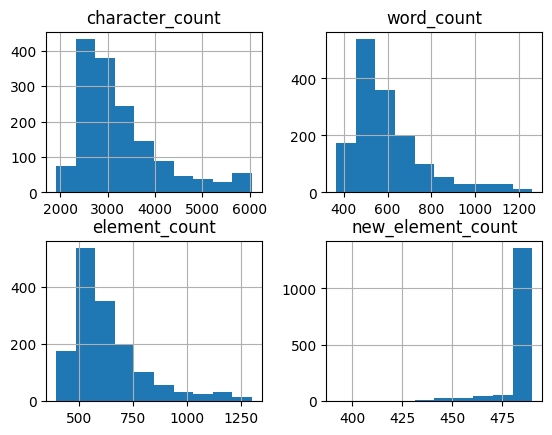

In [152]:
X_raw_preproc2[~X_raw_preproc2.reset_index()['index'].isin(counts['ntext'])].hist()

In [159]:
non = [i for i in range(len(X_raw_preproc2)) if i not in counts['ntext']]

In [160]:
len(non)

1529

In [161]:
for index in np.random.choice(non,10):
    print('====================================================')
    print()
    print(len(X_raw_preproc2.loc[index,'full_text'].split(' ')))
    print(X_raw_preproc2.loc[index,'full_text'])
    print(len(tokenizer(X_raw_preproc2.loc[index,'full_text'])['input_ids']))


490
Winston Churchill is a good person everybody knows that, a person that give good idea or a person that bring idea to life . Thing he say they are true, they can open your mind, and make you think . CR Yes : I agree with Winston Churchill . I know some people say that too, to be success at first; you going failure to failure, in once you try not to failure guest what, you fail again . This can be happen , but Winston was right , to success you can fail all the time . When somebody want to be success in he/she fail, that doesn't mean they cannot " try" again . But the thing is, they need to get up in keep trying on till then . CR If success brought people failure to failure, then what would that be in life, when you fail on try to be success, it not a bad thing cause sometime in life either you: win or you loos, but at least you can try one more time . Failure might be discourages you, but you can Always keeping going to accomplish your gold, or maybe you might " successful" after a

In [140]:
len(X_raw_preproc2),len(counts['index first zero'])

(3910, 2381)

array([[<Axes: title={'center': 'character_count'}>,
        <Axes: title={'center': 'word_count'}>],
       [<Axes: title={'center': 'element_count'}>,
        <Axes: title={'center': 'new_element_count'}>]], dtype=object)

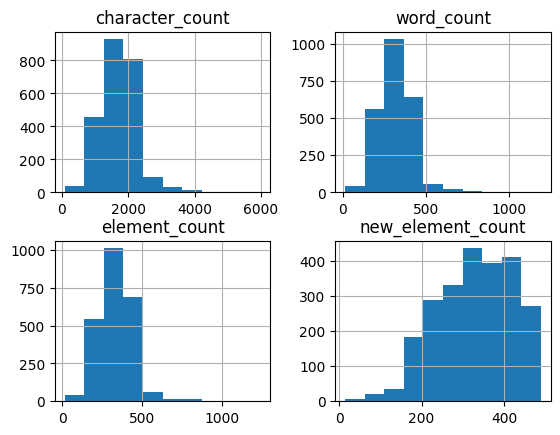

In [153]:
X_raw_preproc2[X_raw_preproc2.reset_index()['index'].isin(counts['ntext'])].hist()

In [136]:
counts['index first zero']

[298,
 510,
 374,
 258,
 372,
 482,
 483,
 445,
 362,
 459,
 235,
 343,
 446,
 274,
 333,
 446,
 480,
 352,
 239,
 349,
 303,
 476,
 495,
 277,
 482,
 425,
 364,
 311,
 479,
 506,
 393,
 195,
 224,
 479,
 470,
 503,
 290,
 472,
 421,
 466,
 290,
 470,
 403,
 256,
 340,
 270,
 386,
 433,
 209,
 369,
 463,
 415,
 276,
 281,
 433,
 510,
 226,
 238,
 478,
 304,
 289,
 396,
 456,
 509,
 284,
 456,
 306,
 463,
 508,
 389,
 439,
 335,
 343,
 364,
 509,
 466,
 369,
 380,
 219,
 341,
 501,
 468,
 370,
 427,
 284,
 368,
 201,
 393,
 247,
 481,
 346,
 394,
 425,
 327,
 463,
 207,
 401,
 293,
 386,
 262,
 361,
 347,
 446,
 315,
 254,
 478,
 184,
 236,
 482,
 264,
 357,
 234,
 422,
 71,
 217,
 492,
 239,
 117,
 506,
 452,
 431,
 469,
 260,
 378,
 206,
 507,
 447,
 305,
 466,
 475,
 303,
 474,
 350,
 214,
 306,
 152,
 383,
 271,
 367,
 414,
 255,
 285,
 373,
 358,
 222,
 474,
 424,
 227,
 377,
 444,
 201,
 376,
 507,
 369,
 400,
 465,
 509,
 364,
 488,
 298,
 414,
 423,
 348,
 351,
 511,
 248,
 433,

In [132]:
X_raw_preproc2.reset_index()['index']

0          0
1          1
2          2
3          3
4          4
        ... 
3905    3905
3906    3906
3907    3907
3908    3908
3909    3909
Name: index, Length: 3910, dtype: int64

In [88]:
print('new_element range : ',X_raw_preproc2.new_element_count.min(),X_raw_preproc2.new_element_count.max())

new_element range :  14 490


In [101]:
tokenized_text_length={}
max_length=-1
index_max_length=-1
index=0
for text in list(X_raw_preproc2.full_text):
    token=tokenizer(text,return_tensors="tf",return_token_type_ids=False)
    tokenized_text_length[index]=token['input_ids'].shape[1]
    if token['input_ids'].shape[1] > max_length:
        max_length= token['input_ids'].shape[1]
        index_max_length=index
    index+=1

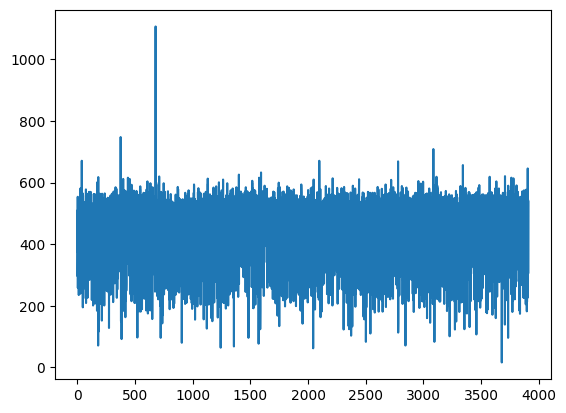

In [102]:
plt.plot(tokenized_text_length.values())

In [103]:
index_max_length,max_length

(678, 1107)

In [108]:
len(X_raw.full_text[678])

2202

### tokenize clean sheet

In [81]:
X_tokenized=tokenizer(list(X_raw.full_text), padding='max_length',truncation=True,return_tensors="tf",return_token_type_ids=False)

In [82]:
X_tokenized.keys(), X_tokenized['input_ids'].shape

(dict_keys(['input_ids', 'attention_mask']), TensorShape([3910, 512]))

In [83]:
X_tokenized

{'input_ids': <tf.Tensor: shape=(3910, 512), dtype=int32, numpy=
array([[  101,   146,  1341, ...,     0,     0,     0],
       [  101,  1332,   170, ...,  1106,  1838,   102],
       [  101, 12956,   117, ...,     0,     0,     0],
       ...,
       [  101,  9612,  2041, ...,  2148,  1111,   102],
       [  101,   107,   138, ...,     0,     0,     0],
       [  101,  2408,  1234, ...,  1112,  1128,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3910, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [84]:
X_tokenized['input_ids'][0]

<tf.Tensor: shape=(512,), dtype=int32, numpy=
array([  101,   146,  1341,  1115,  1651,  1156,  5257,  1121,  3776,
        1120,  1313,   117,  1272,  1152,  1281,  1204,  1138,  1106,
        1849,  1105,  1243,  1146,  1346,  1107,  1103,  2106,  1106,
        5946,  1105,  1202,  1175,  1716,   119,  1781,  1178,  3553,
        6618,  1172,  1272,  1120,  1175,  1402,  1152,   112,  1325,
        1129,  2653,  1167,  2209,   119,  1152,  1209,  1129,  6062,
        1120,  1313,   119,  1109, 20773,  1226,  1104,  1278,  1110,
        2033,  2407,   119,  1128,  5314,  1146,  1301,  8415,  1240,
        3307,  1105,  1301,  1106,  1240,  9369,  1105,  1440,  1120,
        1240,  8217,  1116,   119,  1170,  1128,  1341,  1128,  3015,
         170, 11378,   190,  1301,  1440,  1107,  1103,  5220,  1105,
        1128,  2339,  1719,  1136,  1176,  1122,  1137,  1128,  1440,
        1105,  1267,   170, 24754,   119,  1599,  1128,   112,  1325,
        1138,  1106,  1849,   119,  1114,  1